In [1]:
install.packages("arules")
install.packages("effects")
library(arules)
library(effects)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
also installing the dependencies ‘survey’, ‘estimability’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Loading required package: Matrix

Attaching package: ‘arules’

The following objects are masked from ‘package:base’:

    abbreviate, write

Loading required package: carData
lattice theme set by effectsTheme()
See ?effectsTheme for details.


### Mining Association Rules on the okcupidprofiles data set
I will not read the okcupid profiles data file since I cleaned the data set and renamed it 

The code below is based on the new data set that I have cleaned using python.
I tried 3 ways to clean this data set:

1. Remove all na's of the data set: no_na.csv

2. Fill all na's with None since the na's just mean missing data(blank). (filled.csv)

3. I cleaned this using my personal bias on what I think should be replaced in some parts so I called this data set bias.csv

filled <- read.csv("filled.csv")
this dataset needs further cleaning so I will not run it at this time


In [2]:
bias <- read.csv("bias.csv") 
no_na <- read.csv("no_na.csv") 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  18.00   26.00   30.00   33.01   38.00   69.00 


[18,26.5) [26.5,35) [35,43.5) [43.5,52) [52,60.5) [60.5,69] 
     9815     12245      6307      2670      1555       713 

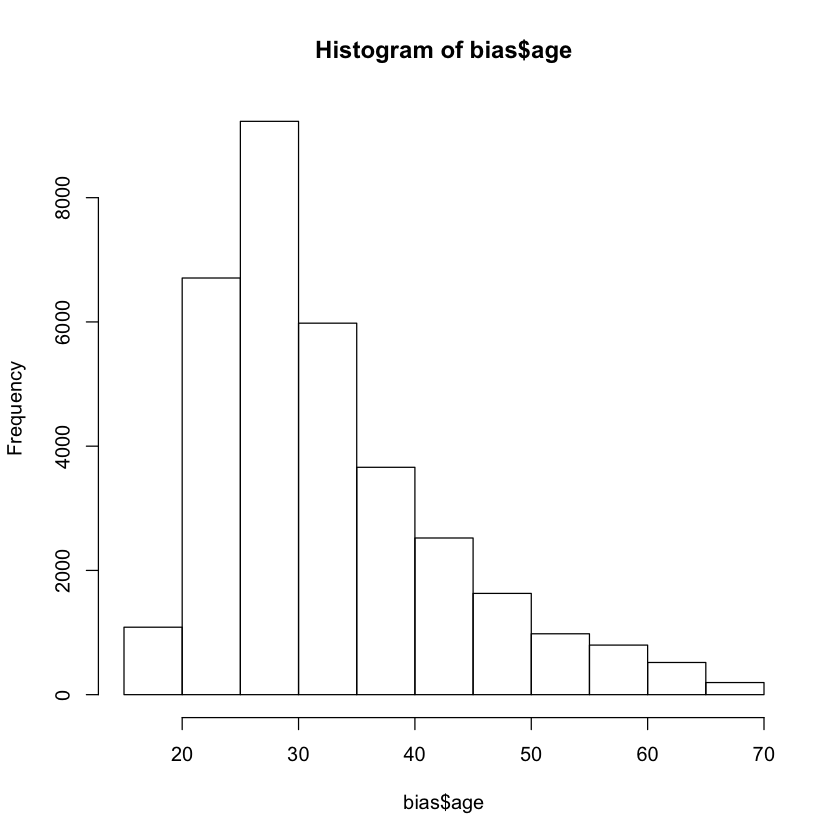

In [3]:
#Since there are numeric varialbes we will make it categorical in some way



#The numeric varialbes are age, height(inches), and income.
#Note: Since income = -1 (rather not say) takes up to almost 40% of the data I removed it from all the data sets. It takes up too much proportion of the data and may affect what I am looking for. I felt that this answer wont really be fun to look at in the results.


#changing Age from numeric to Categorical/Ordinal
#look at the histogram to determine my intervals 

summary(bias$age)
hist(bias$age)
bias$age <- discretize(bias$age, method="interval", breaks=6)
table(bias$age)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    3.0    66.0    68.0    68.3    71.0    95.0 

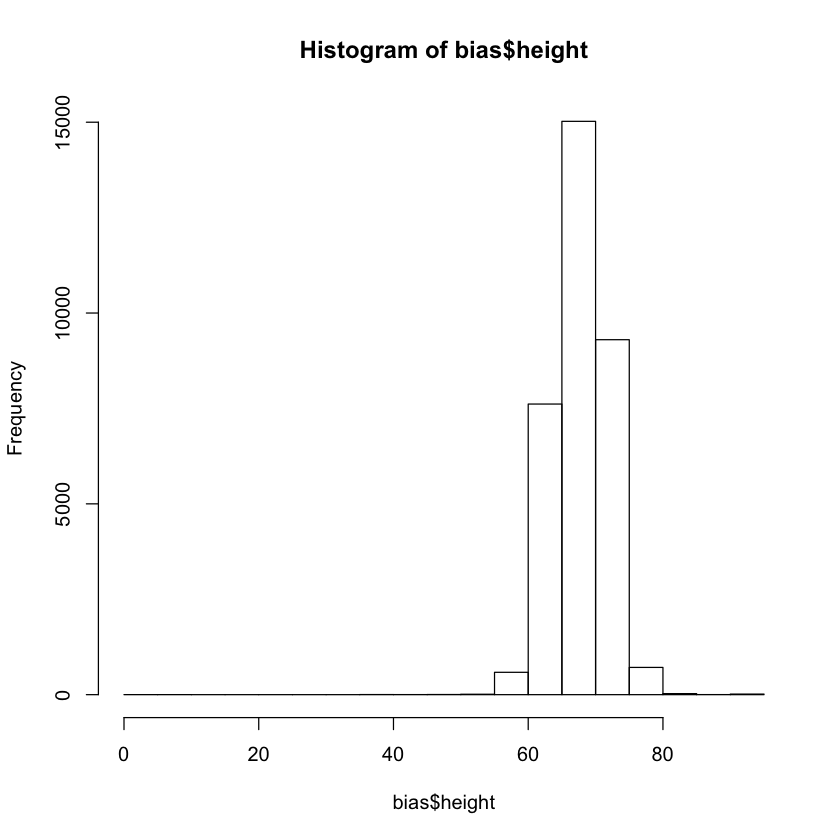

In [4]:
#Changing height from numeric to Categorical/Ordinal
#By osberving the histogram we see that the there are quite a few values that do not make sense at all. We will remove them by subsetting it between the two intervals. 

summary(bias$height)
hist(bias$height)
# having the height in between 55 to 80 inchces
bias <- subset(bias, bias$height >= 55 & bias$height <= 80)
bias$height <- discretize(bias$height, method="interval", breaks=6)

In [5]:
asurv <- apriori(bias)
summary(asurv)
#Algorithm found 4802 rules


Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5     0.1      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 3324 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[5514 item(s), 33243 transaction(s)] done [0.10s].
sorting and recoding items ... [39 item(s)] done [0.01s].
creating transaction tree ... done [0.02s].
checking subsets of size 1 2 3 4 5 6 7 done [0.17s].
writing ... [4802 rule(s)] done [0.00s].
creating S4 object  ... done [0.01s].


set of 4802 rules

rule length distribution (lhs + rhs):sizes
   1    2    3    4    5    6    7 
   4  132  750 1650 1577  606   83 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   4.000   4.000   4.419   5.000   7.000 

summary of quality measures:
    support         confidence          lift            count      
 Min.   :0.1000   Min.   :0.8001   Min.   :0.9291   Min.   : 3325  
 1st Qu.:0.1129   1st Qu.:0.8589   1st Qu.:1.0069   1st Qu.: 3752  
 Median :0.1359   Median :0.8896   Median :1.0267   Median : 4517  
 Mean   :0.1633   Mean   :0.8926   Mean   :1.0427   Mean   : 5429  
 3rd Qu.:0.1789   3rd Qu.:0.9349   3rd Qu.:1.0603   3rd Qu.: 5947  
 Max.   :0.9356   Max.   :0.9815   Max.   :2.4171   Max.   :31103  

mining info:
 data ntransactions support confidence
 bias         33243     0.1        0.8

In [ ]:
#Only consider investigating rules that meet minimum thresholds of support and confidence
asurv <- apriori(bias, parameter=list(supp=0.1, conf=.8))
summary(asurv)

### Definitions of Support, Confidence, and Lift
* Support indicates the proportion of time all items are purchased together, in this case all in one profile
* Confidence indicates how likely that this person has this trait z give having this trait y 
* Lift indicates a measure of how likely a person has this trait given that he/she has trait y,controlling the popularity of trait z and y


In [6]:
inspect(sort(asurv, by="support")[1:10])
#This result for support is quite obvious, since im assuming people who are on okcupid are single and mostly straight. And there are very few osbervations for orientation that is not straight. 

inspect(sort(asurv, by="confidence")[40:50])
#Quite obvious as well since people who are on these apps are mostly likely single.
#We found that if you drink socially, never do drugs, straight, doesn't smoke and speaks english you are mostly likely single.                                                       





     lhs                       rhs                    support   confidence
[1]  {}                     => {status=single}        0.9356255 0.9356255 
[2]  {}                     => {orientation=straight} 0.8643624 0.8643624 
[3]  {}                     => {drugs=never}          0.8231207 0.8231207 
[4]  {}                     => {smokes=no}            0.8197214 0.8197214 
[5]  {orientation=straight} => {status=single}        0.8197214 0.9483539 
[6]  {status=single}        => {orientation=straight} 0.8197214 0.8761213 
[7]  {drugs=never}          => {status=single}        0.7808561 0.9486533 
[8]  {status=single}        => {drugs=never}          0.7808561 0.8345819 
[9]  {smokes=no}            => {status=single}        0.7683422 0.9373211 
[10] {status=single}        => {smokes=no}            0.7683422 0.8212070 
     lift     count
[1]  1.000000 31103
[2]  1.000000 28734
[3]  1.000000 27363
[4]  1.000000 27250
[5]  1.013604 27250
[6]  1.013604 27250
[7]  1.013924 25958
[8]  1.013924 2

In [7]:
inspect(sort(asurv, by="lift")[1:10])
inspect(sort(asurv, by="lift", decreasing=FALSE)[1:10])

#Similar to our common/average understanding of height.If your height is in between 59.2 and 63.3 you're more likely to be female. 

#We found quite a few things through the associations rules. In my opinion they weren't that interesting. I think this may be because people who are on this app are probalby single and mostly males so the stronger assocations rules would always point in that direction. 

     lhs                       rhs       support confidence     lift count
[1]  {height=[59.2,63.3)}   => {sex=f} 0.1079626  0.9606531 2.417120  3589
[2]  {height=[59.2,63.3),                                                 
      status=single}        => {sex=f} 0.1015853  0.9604664 2.416650  3377
[3]  {drugs=never,                                                        
      ethnicity=white,                                                    
      height=[63.3,67.5),                                                 
      orientation=straight} => {sex=f} 0.1034203  0.8352770 2.101659  3438
[4]  {ethnicity=white,                                                    
      height=[63.3,67.5),                                                 
      orientation=straight,                                               
      smokes=no}            => {sex=f} 0.1029690  0.8310269 2.090965  3423
[5]  {drugs=never,                                                        
      ethnicity=white,   

# Changing to the no_na.csv data set 
* the data set contains an alternative way of cleaning

In [8]:
#Now for the no_na dataset

#I ran it and found that it seems to come down to very simlar results 
no_na$age <- discretize(no_na$age, method="interval", breaks=6)
no_na <- subset(no_na, no_na$height >= 55 & no_na$height <= 80)
no_na$height <- discretize(no_na$height, method="interval", breaks=6)
asurv <- apriori(no_na)
summary(asurv)
#Algorithm found 3508 rules
asurv <- apriori(no_na, parameter=list(supp=0.1, conf=.8))
summary(asurv)
inspect(sort(asurv, by="support")[1:10])
inspect(sort(asurv, by="confidence")[1:10])
inspect(sort(asurv, by="lift")[1:10])
inspect(sort(asurv, by="lift", decreasing=FALSE)[1:10])
#and again a lot of the results lead to a conclusion of being associated with single or straight, which is probably the most seen predictors for each profile. 





Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5     0.1      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 711 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[2034 item(s), 7111 transaction(s)] done [0.01s].
sorting and recoding items ... [38 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6 7 done [0.03s].
writing ... [3508 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 3508 rules

rule length distribution (lhs + rhs):sizes
   1    2    3    4    5    6    7 
   3  111  580 1201 1105  447   61 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   4.000   4.000   4.391   5.000   7.000 

summary of quality measures:
    support         confidence          lift            count     
 Min.   :0.1001   Min.   :0.8000   Min.   :0.9156   Min.   : 712  
 1st Qu.:0.1146   1st Qu.:0.8678   1st Qu.:1.0196   1st Qu.: 815  
 Median :0.1361   Median :0.9068   Median :1.0356   Median : 968  
 Mean   :0.1666   Mean   :0.9033   Mean   :1.0575   Mean   :1184  
 3rd Qu.:0.1790   3rd Qu.:0.9468   3rd Qu.:1.0693   3rd Qu.:1273  
 Max.   :0.9376   Max.   :0.9848   Max.   :2.1736   Max.   :6667  

mining info:
  data ntransactions support confidence
 no_na          7111     0.1        0.8

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5     0.1      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 711 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[2034 item(s), 7111 transaction(s)] done [0.01s].
sorting and recoding items ... [38 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6 7 done [0.03s].
writing ... [3508 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 3508 rules

rule length distribution (lhs + rhs):sizes
   1    2    3    4    5    6    7 
   3  111  580 1201 1105  447   61 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   4.000   4.000   4.391   5.000   7.000 

summary of quality measures:
    support         confidence          lift            count     
 Min.   :0.1001   Min.   :0.8000   Min.   :0.9156   Min.   : 712  
 1st Qu.:0.1146   1st Qu.:0.8678   1st Qu.:1.0196   1st Qu.: 815  
 Median :0.1361   Median :0.9068   Median :1.0356   Median : 968  
 Mean   :0.1666   Mean   :0.9033   Mean   :1.0575   Mean   :1184  
 3rd Qu.:0.1790   3rd Qu.:0.9468   3rd Qu.:1.0693   3rd Qu.:1273  
 Max.   :0.9376   Max.   :0.9848   Max.   :2.1736   Max.   :6667  

mining info:
  data ntransactions support confidence
 no_na          7111     0.1        0.8

     lhs                       rhs                    support   confidence
[1]  {}                     => {status=single}        0.9375615 0.9375615 
[2]  {}                     => {orientation=straight} 0.8818732 0.8818732 
[3]  {orientation=straight} => {status=single}        0.8381381 0.9504066 
[4]  {status=single}        => {orientation=straight} 0.8381381 0.8939553 
[5]  {}                     => {smokes=no}            0.8050907 0.8050907 
[6]  {smokes=no}            => {status=single}        0.7574181 0.9407860 
[7]  {status=single}        => {smokes=no}            0.7574181 0.8078596 
[8]  {drugs=never}          => {status=single}        0.7565743 0.9522124 
[9]  {status=single}        => {drugs=never}          0.7565743 0.8069597 
[10] {smokes=no}            => {orientation=straight} 0.7181831 0.8920524 
     lift     count
[1]  1.000000 6667 
[2]  1.000000 6271 
[3]  1.013701 5960 
[4]  1.013701 5960 
[5]  1.000000 5725 
[6]  1.003439 5386 
[7]  1.003439 5386 
[8]  1.015627 5

     lhs                                          rhs                      support confidence      lift count
[1]  {education=working on college/university} => {orientation=straight} 0.1002672  0.8074745 0.9156357   713
[2]  {drugs=sometimes}                         => {orientation=straight} 0.1549712  0.8079179 0.9161384  1102
[3]  {drugs=sometimes,                                                                                       
      ethnicity=white}                         => {orientation=straight} 0.1056110  0.8154180 0.9246432   751
[4]  {drinks=socially,                                                                                       
      drugs=sometimes}                         => {orientation=straight} 0.1025172  0.8172646 0.9267371   729
[5]  {drugs=sometimes,                                                                                       
      ethnicity=white}                         => {status=single}        0.1139080  0.8794788 0.9380492   810
[6]  {drug